In [3]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Let's talk about things
---

To start off—how was the midterm?  Any questions?

Alright, let's get to the fun stuff!

# Probability
---

In [4]:
# What is a measure of probability?

# Measure of the likelihood an event is going to occur out of
# the number of possible events.

```

```

In [5]:
# How do we find a probability in general?

# If there can only be one event that can occur (mutually
# exclusive) out of the possible outcomes at a given time
# you can divide the number of outcomes that represent your
# event by the total number of possible outcomes

```

```

In [6]:
# How do we calculate probability via experimentation or simulation?

# Divide outcomes that represent your event divided by total
# possible outcomes

```

```

# Time for some math :)
---

Let's look, just a bit, into the math behind probabilities.

In [7]:
# If P(Rain) = 0.4 probability that it is raining for the day, 
# and the events are independent then
# what is P(Rain For Two Days)?

prob_some = 0.4
prob_some_twice = ...

In [8]:
# If P(Rain) = 0.4, P(Win the Lottery) = 0.2, and the events are independent then
# what is P(Rain and then Win the Lottery)?



In [9]:
# What about P(Win the Lottery and then Rain)?



In [10]:
# Finally, if our outcome can either be Rain, Sun, or Snow
# then what must P(Snow) equal?



# Let's *make* a dataset!
---

In tonight's discussion we'll be creating our datasets instead of downloading them!

We'll be coming up with games and creating the rules, and then simulating matches to generate a dataset.

In [11]:
# We'll cover more later, but first let's create a game and a dataset to go with it.
#
# Ex. You roll a die and flip a coin
# write down the roll * 1 if heads or the roll * 2 if tails

In [12]:
# Let's create a dataset that contains every possible outcome
# why is this helpful?

```
We can calculate the probability of each outcome this way!
```

In [13]:
Table().with_columns(
    "Roll", [],
    "Flip", [],
    "Score", []
)

Roll,Flip,Score


In [14]:
# What logic should we use to populate our columns?
#
# I think I'd like to use some loops to create the roll and flip columns,
# and then we can calculate the score column afterwards

In [15]:
rolls = make_array()
flips = make_array()

# Each time I play I roll a die
for roll in np.arange(1, 7):
    # Each time I play I flip a coin
    for flip in np.arange(2):
        rolls = np.append(rolls, roll)
        flips = np.append(flips, flip)

In [16]:
possibilities = Table().with_columns(
    "Roll", rolls,
    "Flip", flips
)
possibilities

Roll,Flip
1,0
1,1
2,0
2,1
3,0
3,1
4,0
4,1
5,0
5,1


In [17]:
# Now we should add the "Score" column,
# how do we do this?

In [18]:
def score(roll, flip):
    return roll * (flip + 1)

In [19]:
possibilities = possibilities.with_column(
    "Score", possibilities.apply(score, "Roll", "Flip")
)
possibilities

Roll,Flip,Score
1,0,1
1,1,2
2,0,2
2,1,4
3,0,3
3,1,6
4,0,4
4,1,8
5,0,5
5,1,10


# Let's look at the distribution of sums
---

We want to figure out the exact probability of all possible sums of the game are, based on all possible rolls and flips.

Finally `normed=True` is useful!

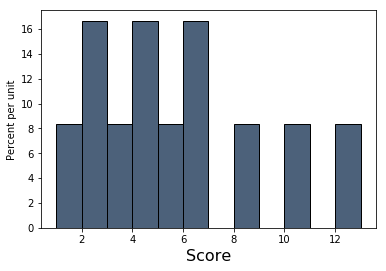

In [20]:
# Let's make the bins of this histogram go from min to max ;) 
possibilities.hist(
    "Score",
    bins = np.arange(
        min(possibilities.column("Score")), max(possibilities.column("Score")) + 2, 1
    )
)

In [21]:
# Let's save those bins for the future
bins = np.arange(min(possibilities.column("Score")), max(possibilities.column("Score")) + 2, 1)

In [22]:
# I also want to print out all of the probabilities for reference

for value in np.unique(possibilities.column("Score")):
    print(value, '\t', possibilities.where("Score", value).num_rows / possibilities.num_rows)

1.0 	 0.08333333333333333
2.0 	 0.16666666666666666
3.0 	 0.08333333333333333
4.0 	 0.16666666666666666
5.0 	 0.08333333333333333
6.0 	 0.16666666666666666
8.0 	 0.08333333333333333
10.0 	 0.08333333333333333
12.0 	 0.08333333333333333


# Distributions: a quick aside
---

## Probability Distribution of a Statistic

* Values of a statistic vary because random samples vary
* “Sampling distribution” or “probability distribution” of the statistic
    - All possible values of the statistic and all the corresponding probabilities.
* Can be hard to calculate: 
    - either have to do the math or have to generate all possible samples and calculate the statistic based on each sample


## Empirical Distribution of a Statistic
* Empirical distribution of the statistic
    - Based on simulated values of the statistic
    - Consists of all the observed values of the statistic,
    - and the proportion of times each value appeared

* Good approximation to the probability distribution of the statistic 
    - if the number of repetitions in the simulation is large


In [23]:
# What kind of distribution did we plot above?

```

```

In [24]:
# What other type of distribution is there, and how do we find it?

```

```

# Let's simulate our game
---

Say I wanted to simulate matches of the game we defined above.

In [25]:
# We could write a function
def simulate():
    roll = np.random.choice(np.arange(1, 7))
    flip = np.random.choice(np.arange(2))
    return roll + flip

# And use it a bunch of times
trials = 10000
results = make_array()

for i in np.arange(trials):
    results = np.append(results, simulate())
    
results

array([ 2.,  4.,  2., ...,  6.,  5.,  6.])

In [26]:
# But... this seems familiar.  Have we seen these "simulations" before?

```
Every match is already in our table of possibilities.
```

In [27]:
# So, what does that mean we can do instead of simulating?

```
We can just sample from our `possibilities` table!
```

# Sampling
---

Sampling is a way of getting a subset of population.

In [28]:
# What do we use sampling for?

```
We can use sampling to estimate a population statistic when we don't have our hands on the full population!
```

### Deterministic sample:
* Sampling scheme doesn’t involve chance

### Probability (random) sample:
* Before the sample is drawn, you have to know the probability of selecting each group of people in the population
* Not all individuals need to have an equal chance of being selected

In [29]:
# If we take every row with a score of 6
# what type of sampling is this?

possibilities.where("Score", 6)

Roll,Flip,Score
3,1,6
6,0,6


```

```

In [30]:
# If we sample a random selection of 5 rows
# what type of sampling is this?

possibilities.sample(5)

Roll,Flip,Score
1,1,2
1,0,1
4,1,8
1,0,1
5,0,5


```

```

In [31]:
# But we still need to be careful, because what about this?

possibilities.sample(5, with_replacement=False)

Roll,Flip,Score
2,1,4
2,0,2
4,1,8
4,0,4
5,0,5


In [32]:
# What happens if we want to sample 100 matches?

possibilities.sample(100)

Roll,Flip,Score
2,1,4
1,0,1
3,1,6
4,1,8
2,1,4
4,0,4
6,1,12
6,0,6
1,0,1
6,1,12


In [33]:
# What if we sample the first 5 rows that we see?
# Is this not the same as simulating 5 times?
# What kind of sampling is this?

possibilities.take(np.arange(5))

Roll,Flip,Score
1,0,1
1,1,2
2,0,2
2,1,4
3,0,3


```

```

In [34]:
# Okay, what if we shuffle the possibilities, and then pick the first 5?
# Should be fine, right?

rows = [possibilities.row(i) for i in np.arange(possibilities.num_rows)]

np.random.shuffle(rows)

shuffled = Table(["Roll", "Flip", "Score"]).with_rows(
    rows
)
shuffled

Roll,Flip,Score
5,0,5
2,0,2
1,0,1
6,0,6
6,1,12
3,1,6
5,1,10
3,0,3
1,1,2
4,1,8


```

```

In [35]:
# What conditions must be satisfied for accurate sampling?

```

```

# What do we mean by "accurate" sampling?
---

I'm glad you asked!

In [36]:
# Recall that sampling is a way for us to discover things about
# a population when we don't have access to that population.
#
# So by that logic, an "accurate" sample would mean...

```
That we can accurately predict things about the population using the sample.
```

In [37]:
# Law of Large Numbers
#
# As long as we satisfy the conditions for an accurate sample
# then we know that:

# As the number of samples increases, the distribution of sample results
# will approach the true distribution of the population

# In other words,
# the empirical distribution will get closer to the probability distribution

In [38]:
# Let's verify this ourselves

In [39]:
# We can define a simulate function
def simulate(num):
    return possibilities.sample(num).column("Score")

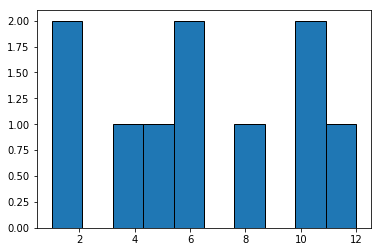

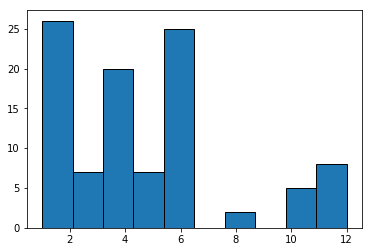

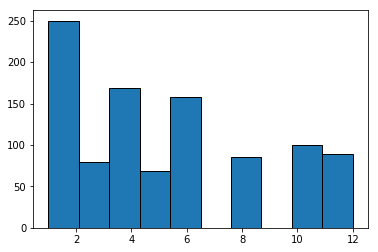

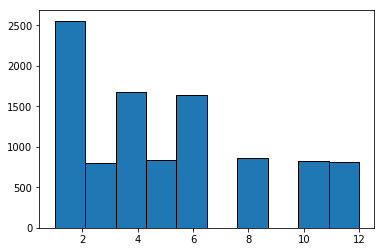

In [40]:
for trials in [10, 100, 1000, 10000]:
    plt.hist(simulate(trials))
    plt.show()

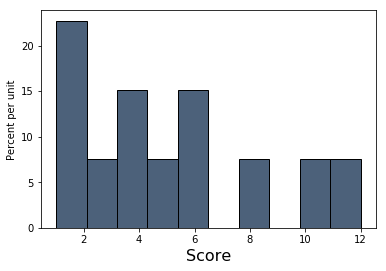

In [41]:
possibilities.hist("Score")

In [42]:
# Do you remember which distribution is which?

```
The top distributions were:
The bottom distribution was:
```

# Sample statistics
---

In addition to the distribution of sample results approaching the true distribution, the average of sample statistics will approach the true population statistic.

In [43]:
# What's a sample statistic?

```
A measurement of the sample, like the mean, median, or min+max/2
```

In [44]:
# Let's get a sample statistic
#
# In addition to choosing a statistic, there's another thing we
# must decide.
#
# What is it?

```
Let's make the statistic the mean.

Let's make the sample size 100.
```

In [45]:
# Alright, now let's compute a sample statistic.  Try with multiple sizes.
sample_size = 10
np.mean(simulate(sample_size))

3.7999999999999998

In [46]:
# What does this mean in words?

```
In 100 matches, the average score was 5.80
```

In [47]:
# Let's find another sample statistic
sample_size = 10
( min(simulate(sample_size)) + max(simulate(sample_size)) ) / 2 # <-- What's wrong here?

6.0

# Distribution of Sample Statistics
---

Recall, we said that:
>As the number of trials grows large, the average of the distribution of sample statistics approaches the population average for that statistic.

In [48]:
# But... how does "number of trials" differ from "sample size"?

```

```

In [49]:
# Alright, let's find a bunch of sample statistics and find their average.
trials = 1000
sample_size = 10

sample_stats = make_array()

for trial in np.arange(trials):
    stat = np.mean(simulate(sample_size))
    sample_stats = np.append(sample_stats, stat)
    
np.mean(sample_stats)

5.2651000000000003

In [50]:
# We should probably know what the true population statistic is!
np.mean(possibilities.column("Score"))

5.25

In [51]:
# Let's change around the statistic we calculate :) 

In [53]:
# Alright, let's find a bunch of sample statistics and find their average.
trials = 1000
sample_size = 10

sample_stats = make_array()

for trial in np.arange(trials):
    stat = np.mean(simulate(sample_size))
    sample_stats = np.append(sample_stats, stat)
    
np.mean(sample_stats), np.mean(possibilities.column("Score"))

(5.2649999999999997, 5.25)

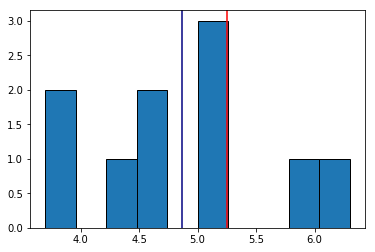

In [62]:
# Let's plot the distribution of sample means and see what's going on as trials
# and sample size change.
trials = 10
sample_size = 10

sample_stats = make_array()

for trial in np.arange(trials):
    stat = np.mean(simulate(sample_size))
    sample_stats = np.append(sample_stats, stat)
    
plt.hist(sample_stats)
plt.axvline(np.mean(possibilities.column("Score")), c='r')
plt.axvline(np.mean(np.mean(sample_stats)), c='navy')

In [174]:
# What is the relationship between accuracy and trials?

# As the number of trials increases, the accuracy increases

```

```

In [63]:
# What is the relationship between accuracy and sample size?

# As the sample size increases, the accuracy increases

```

```